# Autoencoder Architecture Visualization

This notebook provides various approaches to visualize the architecture of an autoencoder model, helping to better understand the model structure, data flow, and layer relationships.

## Import Required Libraries

Import necessary libraries for model visualization including TensorFlow, Matplotlib, pydot, and graphviz.

In [1]:
# Import Required Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from IPython.display import Image, display

# Install visualization libraries if needed
# Uncomment the following if you need to install these packages
# !pip install pydot
# !pip install graphviz

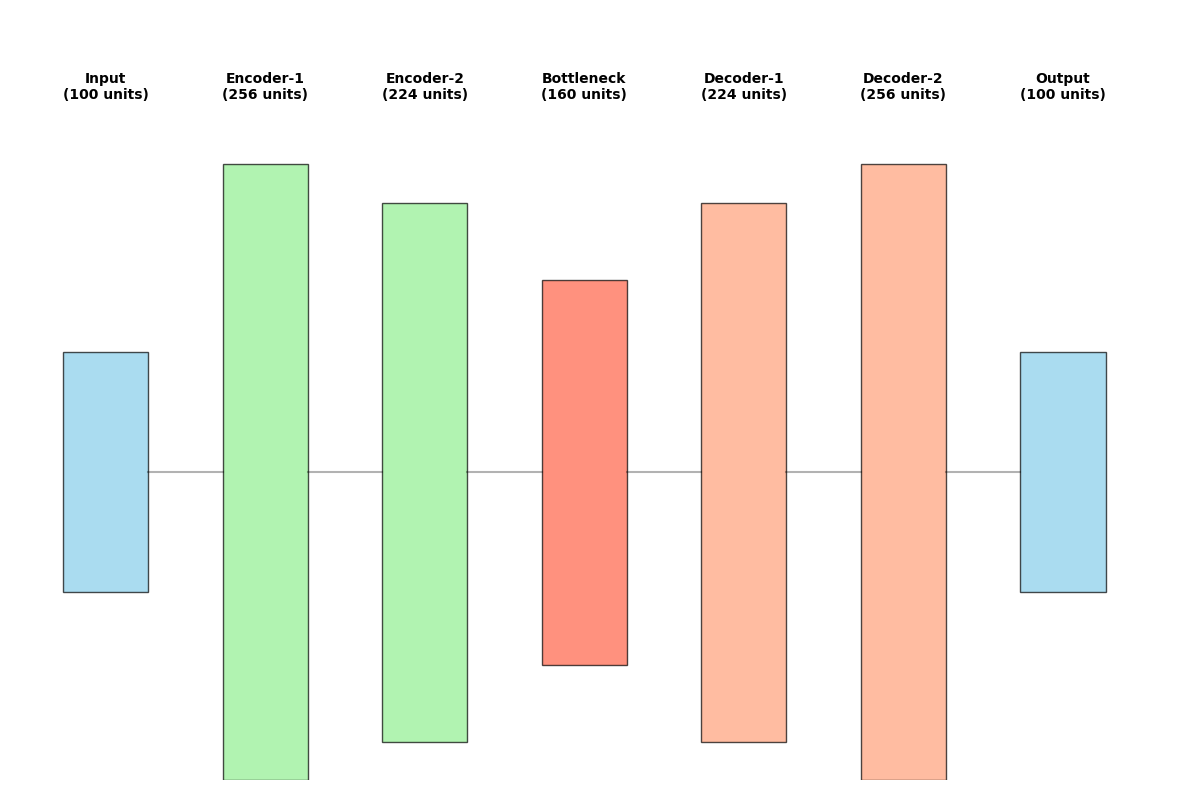

In [2]:
import matplotlib.patches as patches

def create_detailed_architecture(figsize=(12, 8)):
    """Create a detailed visualization of the autoencoder architecture"""
    fig, ax = plt.subplots(figsize=figsize)
    
    # Define layer dimensions
    layers = [
        {"name": "Input", "neurons": 100},
        {"name": "Encoder-1", "neurons": 256},
        {"name": "Encoder-2", "neurons": 224},
        {"name": "Bottleneck", "neurons": 160},
        {"name": "Decoder-1", "neurons": 224},
        {"name": "Decoder-2", "neurons": 256},
        {"name": "Output", "neurons": 100}
    ]
    
    # Calculate positions
    horizontal_spacing = 1.5
    max_neurons = max([layer["neurons"] for layer in layers])
    neuron_spacing = 0.8 / max_neurons
    
    # Draw layers
    for i, layer in enumerate(layers):
        x_pos = i * horizontal_spacing
        num_neurons = layer["neurons"]
        
        # Scale the height of the box based on the number of neurons
        height = num_neurons * neuron_spacing
        # Center the box vertically
        y_pos = (0.8 - height) / 2
        
        # Draw the layer box
        color = 'skyblue'
        if layer["name"] == "Bottleneck":
            color = 'tomato'
        elif "Encoder" in layer["name"]:
            color = 'lightgreen'
        elif "Decoder" in layer["name"]:
            color = 'lightsalmon'
            
        rect = patches.Rectangle((x_pos, y_pos), 0.8, height, linewidth=1, 
                                edgecolor='black', facecolor=color, alpha=0.7)
        ax.add_patch(rect)
        
        # Add layer name and neuron count
        plt.text(x_pos + 0.4, 0.9, f"{layer['name']}\n({layer['neurons']} units)", 
                ha='center', va='center', fontsize=10, fontweight='bold')
        
        # Draw connections to the next layer
        if i < len(layers) - 1:
            next_layer = layers[i + 1]
            next_height = next_layer["neurons"] * neuron_spacing
            next_y_pos = (0.8 - next_height) / 2
            
            # Draw connections (simplified)
            plt.plot([x_pos + 0.8, (i+1) * horizontal_spacing], 
                    [y_pos + height/2, next_y_pos + next_height/2], 
                    'k-', alpha=0.3)
    
    # Add titles and labels
    # plt.title("Detailed Autoencoder Architecture", fontsize=16, pad=20)
    
    # Remove axes
    ax.set_xlim(-0.5, horizontal_spacing * (len(layers) - 1) + 1.5)
    ax.set_ylim(0, 1)
    ax.axis('off')
    
    plt.tight_layout()
    plt.savefig('autoencoder_detailed_architecture.png', dpi=300, bbox_inches='tight')
    plt.show()

# Create the visualization
create_detailed_architecture()